In [54]:

import pandas as pd

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [56]:
%matplotlib inline

# Common seed value to be used whenever required
seed = 79
np.random.seed(seed)

In [57]:
a=["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9","RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9","T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility","Appliances"]
#load the datasets
energy = pd.read_csv(r"C:\Users\chandan sharma\Desktop\research\-------------MOST\final project\Data-driven-prediction-models-of-energy-use-of-appliances-in-a-low-energy-house-master\dataset\training.csv",usecols=a)

In [58]:
energy.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9
4,50,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,...,18.1,48.590000,17.000000,45.29,6.016667,734.0,92.0,5.333333,43.833333,4.8


In [59]:
# Import pearson relation method from SciPy
from scipy.stats import pearsonr

# Calculate the coefficient and p-value
corr_coef, p_val = pearsonr(energy["T7"], energy["T9"])
print("Correlation coefficient : {}".format(corr_coef))
print("p-value : {}".format(p_val))

Correlation coefficient : 0.9443630975074825
p-value : 0.0


In [60]:
#We can see that there is a very high degree of positive correlation between this two columns. 
#Also, p-value is less than 0.01. 
#Thereofore, we can reject the null hypothesis that this two columns don't affect each other.

In [61]:
# To generate all pairs for given columns
from itertools import combinations


In [62]:
for pair in combinations(energy.columns, 2):
    col_1, col_2 = pair
    # Calculate the coefficient and p-value
    corr_coef, p_val = pearsonr(energy[col_1], energy[col_2])
    # Check for high correlation
    if corr_coef > 0.9 or corr_coef < -0.9:
        # Print details for pairs with high correlation
        print("Column pair : {}, {}".format(*pair))
        print("Correlation coefficient : {}".format(corr_coef))
        print("p-value : {}".format(p_val))

Column pair : T3, T9
Correlation coefficient : 0.9012828822650197
p-value : 0.0
Column pair : T5, T9
Correlation coefficient : 0.9118602394113892
p-value : 0.0
Column pair : T6, T_out
Correlation coefficient : 0.9748504632027215
p-value : 0.0
Column pair : T7, T9
Correlation coefficient : 0.9443630975074825
p-value : 0.0


In [63]:
#Interestingly, 3 columns have a high degree of correlation with T9, 
#all of which have a p-value < 0.01. Therefore, T9 can be considered as redundant.

#Also, a very high correlation exists between features T6 and T_out.
#This shouldn't be surprising as T6 is reading from a temperature sensor kept outside the building 
#and T_out is temperature obtained from Weather station.

#Let's plot T6 and T_out to get a detailed visualization.

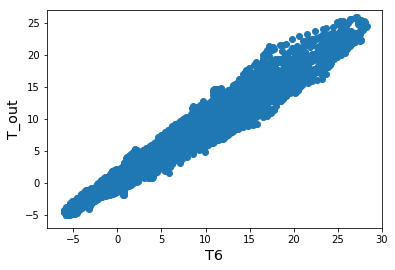

In [64]:
plt.xlabel("T6", fontsize='x-large')
plt.ylabel("T_out", fontsize='x-large')

plt.xlim(int(energy.T6.min()) - 2, int(energy.T6.max()) + 2)
plt.ylim(int(energy.T_out.min()) - 2, int(energy.T_out.max()) + 2)

plt.scatter(energy["T6"], energy["T_out"])

In [65]:
#It is evident from the plot as well that these two features are highly correlated.


In [66]:
'''Benchmark Model¶
For benchmark, I will use Linear regression, using all the features as input data and without scaling the dataset.
This will give an idea about the improvements gained from:

Performing feature scaling.
Performing feature selection.
Performing cross validation.
Using more complex Regression algorithms.
Hyper-parameter tuning of the regressor.'''

'Benchmark Model¶\nFor benchmark, I will use Linear regression, using all the features as input data and without scaling the dataset.\nThis will give an idea about the improvements gained from:\n\nPerforming feature scaling.\nPerforming feature selection.\nPerforming cross validation.\nUsing more complex Regression algorithms.\nHyper-parameter tuning of the regressor.'

In [67]:
from sklearn.linear_model import LinearRegression
from time import time

# Prepare the data
X_train = energy.drop("Appliances", axis=1)
y_train = energy["Appliances"]

In [68]:
test = pd.read_csv(r"C:\Users\chandan sharma\Desktop\research\-------------MOST\final project\Data-driven-prediction-models-of-energy-use-of-appliances-in-a-low-energy-house-master\dataset\testing_validation.csv",usecols=a)

In [50]:
# Separate the features and the target variable
X_test = test.drop("Appliances", axis=1)
y_test = test["Appliances"]


In [69]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier



In [70]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)



In [71]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [72]:
y_pred=clf.predict(X_test)

In [74]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("percentage error:",(np.mean(np.abs(y_test - y_pred) / y_test)*100))

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

print('R2 score: %.2f' % r2_score(y_test, y_pred))

print("Mean absolute error:%.2f" % mean_absolute_error(y_test, y_pred))

meanSquaredError=mean_squared_error(y_test, y_pred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

Accuracy: 0.2801400700350175
percentage error: 28.525327176630476
Mean squared error: 5990.35
R2 score: 0.52
Mean absolute error:32.08
MSE: 5990.345172586293
RMSE: 77.39732018995421
